<a href="https://colab.research.google.com/github/joaquinhojman/AprendizajeEstadistico-TPFinal/blob/main/Cluster_Analysis_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import datetime as dt
import numpy as np


In [122]:
#Cargo el set de datos
url = 'https://raw.githubusercontent.com/joaquinhojman/AprendizajeEstadistico-TPFinal/main/heart.csv'

df = pd.read_csv(url)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


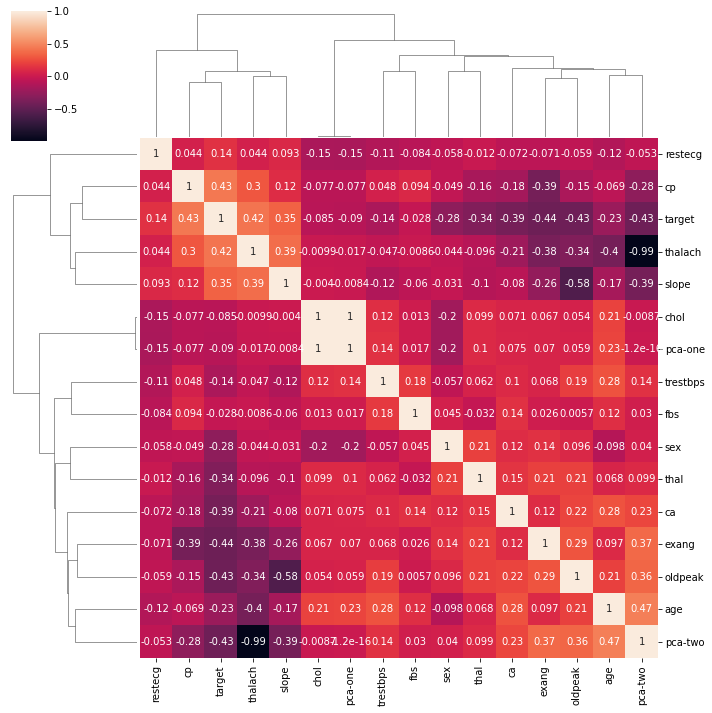

In [110]:
sns.clustermap(df.corr(),annot=True)


##K-Means

k-Means comienza eligiendo k centros aleatorios que puede establecer usted mismo. Luego, todos los puntos de datos se asignan al centro más cercano en función de su distancia euclidiana.

 Se puede determinar los k clústeres óptimos mediante el método del codo . Se desea encontrar el punto de rendimiento decrecientes al seleccionar un rango de clústeres. Puedo hacer esto trazando el número de grupos en el eje X y la inercia (criterio de suma de cuadrados dentro del grupo) en el eje Y. A continuación, selecciono k para el que encuentra un pliegue

 Tiene sentido usar la distancia euclidea ya que al ser relativamente pocos datos no hay problemas con la "maldicion de la dimensionalidad": Esta maldición, en parte, establece que las distancias euclidianas en alta dimensionalidad tienen muy poco significado ya que a menudo están muy juntas.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

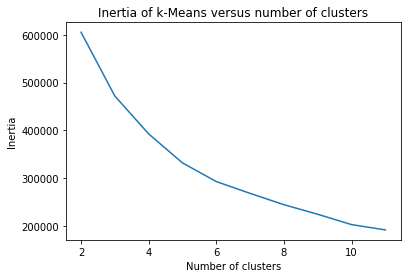

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
scores = [KMeans(n_clusters=i+2).fit(df).inertia_ 
          for i in range(10)]
sns.lineplot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")


In [129]:
#Elegimos K=2 
X=df.iloc[:,:].values

kmeans = KMeans(n_clusters=2)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)


[1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0
 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0
 1 0 1 0 1 1 1 1 1 0 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 1
 0 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 1 1 0 1
 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1
 1 1 1 0 0 1 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1
 1 1 1 0 1 1 1]


In [130]:
kmeans.cluster_centers_

array([[5.66545455e+01, 5.81818182e-01, 8.18181818e-01, 1.34918182e+02,
        2.98909091e+02, 1.36363636e-01, 4.45454545e-01, 1.45836364e+02,
        4.00000000e-01, 1.15545455e+00, 1.38181818e+00, 8.36363636e-01,
        2.40909091e+00, 4.54545455e-01],
       [5.30621762e+01, 7.40932642e-01, 1.05181347e+00, 1.29746114e+02,
        2.16259067e+02, 1.55440415e-01, 5.75129534e-01, 1.51818653e+02,
        2.84974093e-01, 9.73575130e-01, 1.40932642e+00, 6.68393782e-01,
        2.25906736e+00, 5.95854922e-01]])

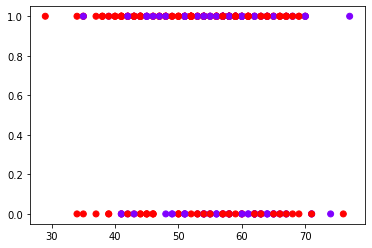

In [132]:
plt.scatter(X[:,0],X[:,1],c=y_kmeans,cmap='rainbow')

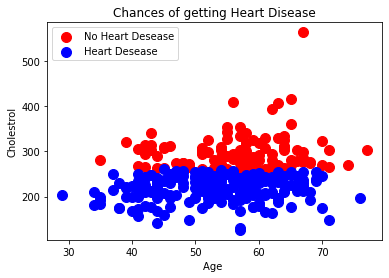

In [148]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0,4], s = 100, c = 'red', label = 'No Heart Desease')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 4], s = 100, c = 'blue', label = 'Heart Desease')
plt.title('Chances of getting Heart Disease')
plt.xlabel('Age ')
plt.ylabel('Cholestrol')
plt.legend()
plt.show()

##DBSCAN


La agrupación también se puede realizar en función de la densidad de puntos de datos. Un ejemplo es el agrupamiento espacial de aplicaciones con ruido basado en densidad (DBSCAN), que agrupa puntos de datos si son lo suficientemente densos. DBSCAN identifica clústeres y los expande escaneando vecindarios. Si no puede encontrar ningún punto para agregar, simplemente pasa a un nuevo punto con la esperanza de encontrar un nuevo grupo. Los puntos que carecen de suficientes vecinos para agruparse se clasifican como ruido:


La diferencia con k-means es que DBSCAN no requiere que especifique el número de clústeres.

In [7]:
# Carga de librerías.
import pandas as pd
from sklearn.decomposition import PCA
import sklearn.neighbors
from sklearn.neighbors import kneighbors_graph
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN


In [9]:
# Se normalizan los datos con MinMax()
min_max_scaler = preprocessing.MinMaxScaler() 
df_escalado = min_max_scaler.fit_transform(df)
df_escalado = pd.DataFrame(df_escalado) 
df_escalado = df_escalado.rename(columns = {0: 'Target'})
df_escalado

,Target,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.00,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.00,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.00,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.00,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.00,0.666667,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.000000,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.032258,0.5,0.00,1.000000,0.0
299,0.333333,1.0,1.000000,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.193548,0.5,0.00,1.000000,0.0
300,0.812500,1.0,0.000000,0.471698,0.152968,1.0,0.5,0.534351,0.0,0.548387,0.5,0.50,1.000000,0.0
301,0.583333,1.0,0.000000,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.5,0.25,1.000000,0.0


Text(0.5, 0, 'Target')

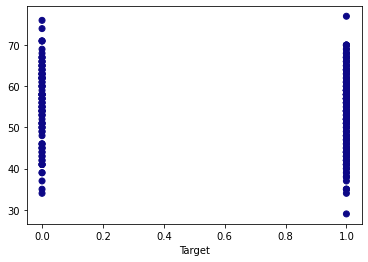

In [13]:
# Ejecutamos DBSCAN
dbscan = DBSCAN(eps=0.08, min_samples = 5, metric = "euclidean").fit(df_escalado)
clusters = dbscan.fit_predict(df_escalado)
df_values = df.values
# Graficación de los clústers.
plt.scatter(df_values[:, 1], df_values[:, 0], c=clusters, cmap="plasma")
plt.xlabel("Target")


In [39]:
db=DBSCAN(eps=13.0,min_samples=100).fit(df)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)


Estimated number of clusters: 0


No tiene sentido usar DBScan (creo)

## Dist euclidea vs Dist Coseno (k-means)

La puntuación de Silhouette mide la separabilidad entre grupos en función de las distancias entre grupos y dentro de ellos. Calcula la distancia media dentro del conglomerado ( a), que es la distancia media dentro de un conglomerado, y la distancia media del conglomerado más cercano ( b), que es la distancia entre una muestra y el conglomerado más cercano del que no forma parte, para cada muestra. Entonces, el coeficiente de Silhouette para una muestra es (b - a) / max(a, b).


In [44]:
#Calculemos la puntuación de silueta para K-Means con dist euclidea y K-Means con coseno

from sklearn.metrics import silhouette_score
# Preparar modelos 
kmeans = KMeans(n_clusters = 2).fit(df) 
normalized_vectors = preprocessing.normalize(df) 
normalized_kmeans = KMeans(n_clusters = 2).fit(normalized_vectors) 
# Imprimir resultados 
print('Euclidean kmeans: '+str(silhouette_score(df, kmeans.labels_,metric = 'euclidean'))) 
print('Coseno kmeans: '+str(silhouette_score (normalized_vectors,normalized_kmeans.labels_,metric = 'cosine'))) 



Euclidean kmeans: 0.3893747942796262
Coseno kmeans: 0.5463417590434462


El valor de la silueta es una medida de cuán similar es un objeto a su propio cúmulo (cohesión) en comparación con otros cúmulos (separación). La silueta va de -1 a +1, donde un valor alto indica que el objeto está bien emparejado con su propio cúmulo y mal emparejado con los cúmulos vecinos.

Nos quedamos entonces con la distancia euclidea


###Análisis de componentes principales (PCA)
PCA funciona mediante el uso de transformaciones ortogonales para convertir entidades correlacionadas en un conjunto de valores de entidades no correlacionadas linealmente. Lo que queda son las características que contienen la mayor variación posible. 

In [79]:
#Estandarizando los datos
from sklearn.preprocessing import StandardScaler
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
x

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -0.71442887,
        -2.14887271,  0.91452919],
       [-1.91531289,  0.68100522,  1.00257707, ..., -0.71442887,
        -0.51292188,  0.91452919],
       [-1.47415758, -1.46841752,  0.03203122, ..., -0.71442887,
        -0.51292188,  0.91452919],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ...,  1.24459328,
         1.12302895, -1.09345881],
       [ 0.29046364,  0.68100522, -0.93851463, ...,  0.26508221,
         1.12302895, -1.09345881],
       [ 0.29046364, -1.46841752,  0.03203122, ...,  0.26508221,
        -0.51292188, -1.09345881]])

In [80]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf

,principal component 1,principal component 2,target
0,-0.051739,2.624022,1
1,-0.817441,-0.730375,1
2,-2.057599,-0.039098,1
3,-1.903043,-0.596701,1
4,-0.768371,0.412545,1
...,...,...,...
298,1.485287,-0.423483,0
299,-0.140325,-1.215922,0
300,2.681772,0.593019,0
301,2.170858,-2.166992,0


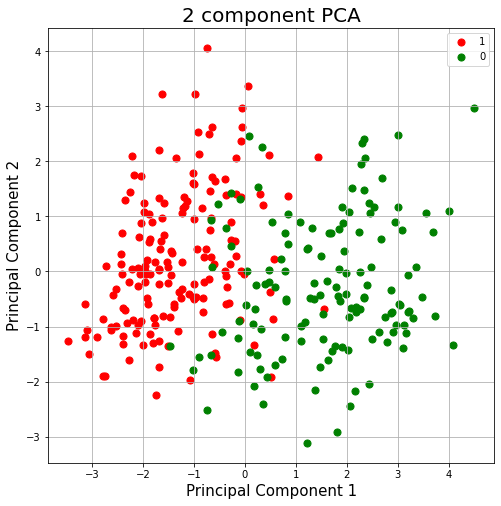

In [81]:

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1, 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [82]:
pca.explained_variance_ratio_


array([0.23581966, 0.11229748])

La primer componente tiene el 23% de la varianza y la segunda el 11%

##t-SNE

t-SNE es un algoritmo para visualizar datos de alta dimensión. Utiliza relaciones locales entre puntos para crear un mapeo de baja dimensión que da como resultado la captura de estructuras no lineales.

Comienza creando una distribución de probabilidad (es decir, gaussiana) que dicta las relaciones entre los puntos vecinos. Luego, construye un espacio de baja dimensión que sigue esa distribución lo más cerca posible utilizando la distribución t de Student. Ahora puede preguntarse por qué utiliza una distribución t de Student en este paso. Bueno, una distribución gaussiana tiene una cola corta que aplasta los puntos cercanos. Si usa una distribución t de Student, la cola es más larga y es más probable que los puntos estén separados.

